In [34]:
name = "Yicheng CHEN"
date_returned = "09 Mar 2025"

# Lab 7. Linear transformations
Hardware 1 course - Mathematics<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries and functions.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, dot

## Linear transformations

Below is given a code that *generates* (x, y) - coordinates presenting points in 2D. The data coordinates are given in the *augmented vector format*, e.g 

- The first row `p[0, :]` contains the x-coordinate values
- The second row `p[1, :]` contains the y-coordinate values, and
- The third row `p[2, :]` have constant values of 1.

In the second cell is a function that draws the data points as graphics. 

Your task is to *rotate*, *move* and *scale* the datapoints using linear transformations and matrix operations.

### Data-points

This code creates the original datapoints. All coordinates are packed to variable `p` (points), which is an augmented vector.

**NOTE: Do not change this code!**

In [36]:
# Use a parameter to create graphics
t = np.linspace(0, 2*np.pi)
# Full circle (face)
x1 = np.cos(t) + 1.0
y1 = np.sin(t) + 1.0
# Two smaller full circles (eyes)
x2 = np.cos(t)/10 + 0.6
y2 = np.sin(t)/10 + 1.5
x3 = np.cos(t)/10 + 1.4
y3 = np.sin(t)/10 + 1.5
# Half circle (mouth)
x4 = np.cos(t/2)/2 + 1.0
y4 = -np.sin(t/2)/2 + 1.0
# Merge to create an augmented vector
p = np.zeros((3, 200))
p[0, :] = np.hstack((x1, x2, x3, x4))
p[1, :] = np.hstack((y1, y2, y3, y4))
p[2, :] = np.ones((1, 200))

### Drawing function

Later in your code, you can directly call this function to show the transformed points. For example, if your transformation is described in matrix `A`, you can calculate the new coordinates and draw the transformed figure:

```
# Transform the original coordinates using matrix multiplication
p2 = A @ p
# Draw the new coordinate
draw(p2)
plt.show()
```

**NOTE:** Do not change this code!

In [37]:
def draw(p):
    plt.figure(figsize = (7, 7))
    plt.plot(p[0, :50], p[1, :50])
    plt.fill(p[0, 50:100], p[1, 50:100])
    plt.fill(p[0, 100:150], p[1, 100:150])
    plt.fill(p[0, 150:200], p[1, 150:200])
    plt.axhline(0, color = 'red')
    plt.axvline(0, color = 'red')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.show()

### Original graphics

Here is the original points displayed as graphics. Notice, the different colors of the eyes.

**NOTE: Do not change this code! Just observe the graphical results.**

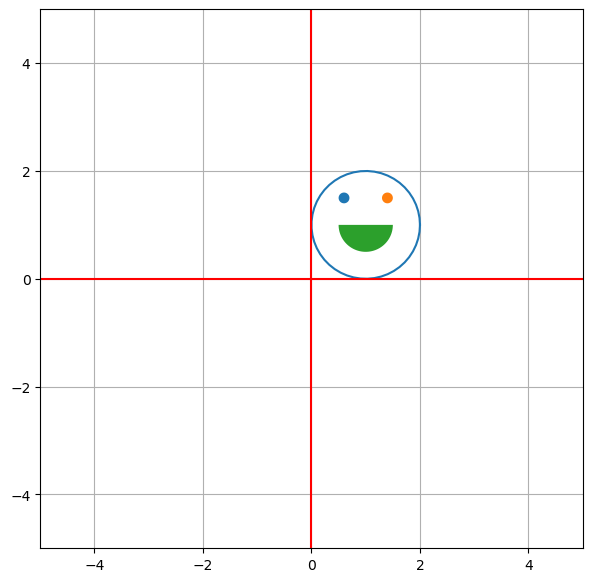

In [38]:
draw(p)
plt.show()

---
## Problem 1

Using the orginal points $p$, rotate the graphics by 30 degrees counterclockwise.

Tip: First, create a 3x3 rotation matrix, and then multiply (dot-product) the original points with the rotation matrix to get the new coordinates.

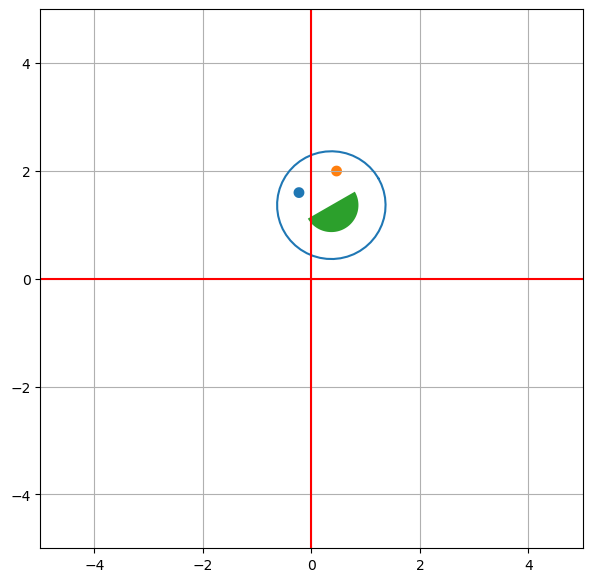

In [39]:
# Your solution to problem 1. Complete the code.
theta = np.pi / 6  # 45 degrees in radians
Rot = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])

p2 = Rot @ p
draw(p2)
plt.show()

---
## Problem 2
You can get this image, when you reflect the **previous solution** (=problem 1) across the vertical axis (y-axis). 

Tip: Think, how reflection can be presented using matrix transformations.

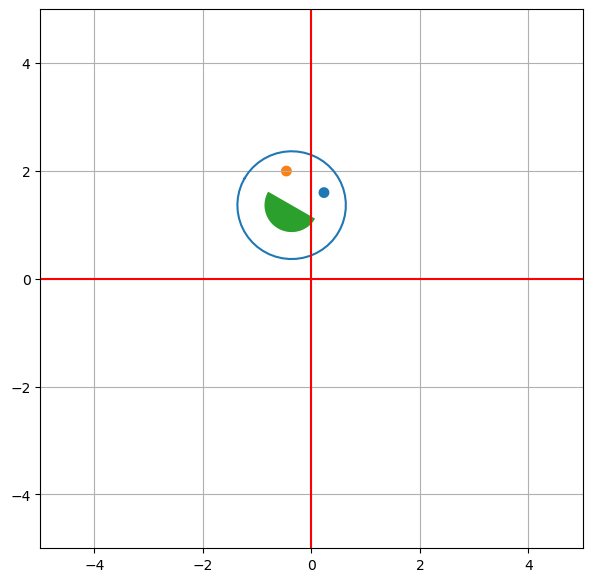

In [40]:
# Solution for problem 2

Ref = np.array([[-1, 0, 0],
                [0, 1, 0],
                [0, 0, -1]])

p3 = Ref @ p2
draw(p3)
plt.show()


---
## Problem 3

Create a graphics like this.

- Tip: Compare the results of problem 2 to this one. What do you observe? How the solution of problem 2 could be transformed to the solution of problem 3?

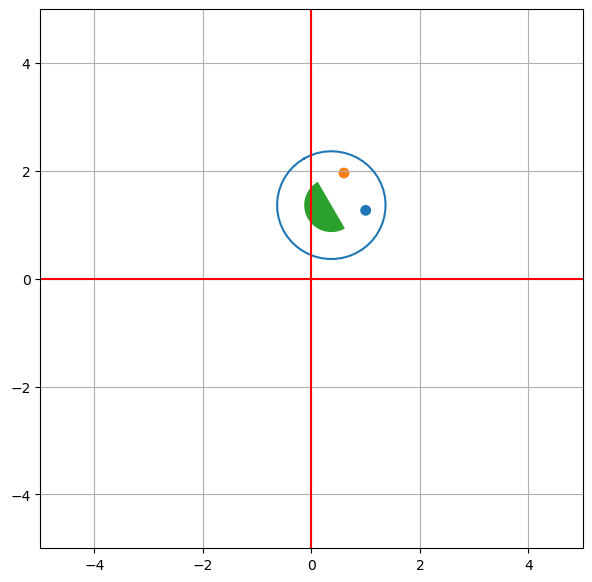

In [41]:
## Problem 3 solution

theta = -np.pi / 6  # 45 degrees in radians
Rot = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])

p4 = Rot @ p3
draw(p4)
plt.show()


---
## Problem 4

In this problem, you should move the original points 3 units to the left and 1 unit upwards, followed by scaling (enlarging) it by 2 times both in x and y directions.

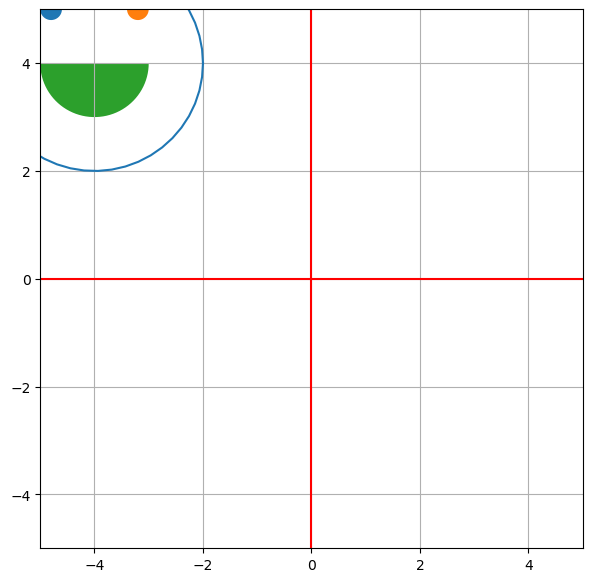

In [42]:
## Solution for problem 4

T = np.array([[1, 0, -3],  # Translation matrix
              [0, 1, 1],
              [0, 0, 1]])

S = np.array([[2, 0, 0],  # Scaling matrix
              [0, 2, 0],
              [0, 0, 1]])


p5 = S @ T @ p
draw(p5)
plt.show()


## Problem 5

Finally, based on what you have learnt
- first, think how this image has been created using linear transformations,
- then, find the code which transforms the original points to show the graphics as below.

Tips: 
- You may need a sequence of transformations in order to get the right results.
- There are several ways to solve this problem. Can you figure out at least two different ones?

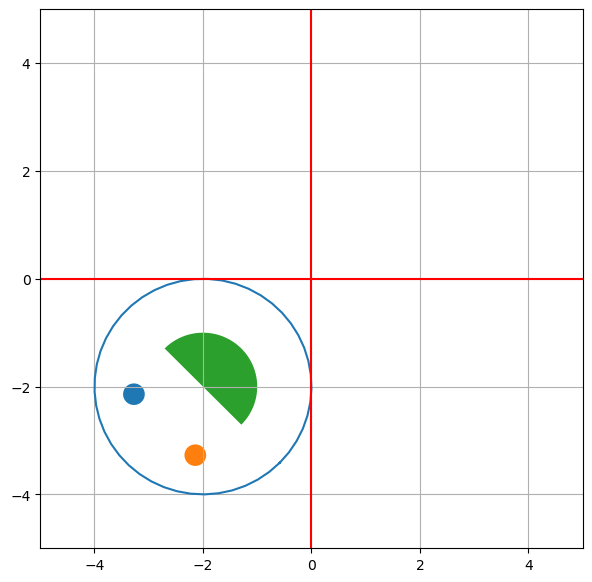

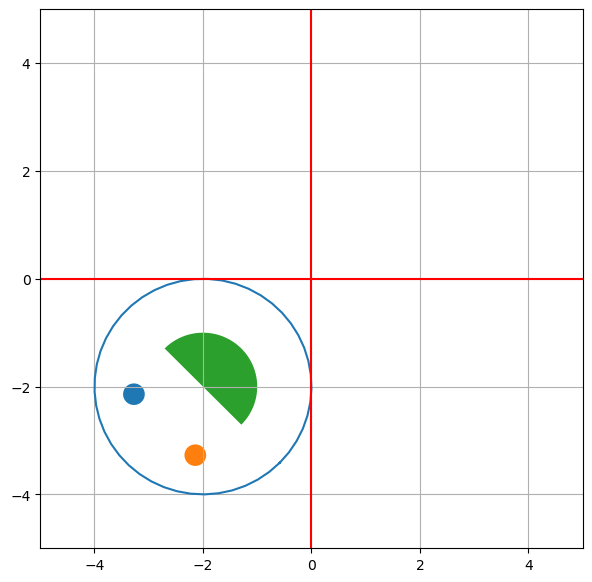

In [43]:
## Solution for problem 5



# Method 1
Ref = np.array([[-1, 0, 0],
                [0, 1, 0],
                [0, 0, -1]])

T = np.array([[1, 0, -1],  # Translation matrix
              [0, 1, 1],
              [0, 0, 1]])


theta = 3* np.pi / 4  # 45 degrees in radians
Rot = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])

S = np.array([[2, 0, 0],  # Scaling matrix
              [0, 2, 0],
              [0, 0, 1]])

T2 = np.array([[1, 0, 2],  # Translation matrix
              [0, 1, 2],
              [0, 0, 1]])

p5 =  T2 @ S @ Rot @ T @ Ref @ p
draw(p5)
plt.show()


# Method 2

Ref = np.array([[-1, 0, 0],
                [0, 1, 0],
                [0, 0, -1]])

T = np.array([[1, 0, -1],  # Translation matrix
              [0, 1, 1],
              [0, 0, 1]])


theta = 3* np.pi / 4  # 45 degrees in radians
Rot = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])

T2 = np.array([[1, 0, 1],  # Translation matrix
              [0, 1, 1],
              [0, 0, 1]])

S = np.array([[2, 0, 0],  # Scaling matrix
              [0, 2, 0],
              [0, 0, 1]])



p5 = S @ T2@Rot@ T@Ref@ p
draw(p5)
plt.show()

